In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [146]:
file_path = 'credit_risk_dataset.csv'
credit_df = pd.read_csv(file_path)
credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Feature Descriptions
person_age: Age of the individual applying for the loan.

person_income: Annual income of the individual.

person_home_ownership: Type of home ownership of the individual.

rent: The individual is currently renting a property.

mortgage: The individual has a mortgage on the property they own.

own: The individual owns their home outright.

other: Other categories of home ownership that may be specific to the dataset.

person_emp_length: Employment length of the individual in years.

loan_intent: The intent behind the loan application.

loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.

    A: The borrower has a high creditworthiness, indicating low risk.
    B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    C: The borrower's creditworthiness is moderate.
    D: The borrower is considered to have higher risk compared to previous grades.
    E: The borrower's creditworthiness is lower, indicating a higher risk.
    F: The borrower poses a significant credit risk.
    G: The borrower's creditworthiness is the lowest, signifying the highest risk.
loan_amnt: The loan amount requested by the individual.

loan_int_rate: The interest rate associated with the loan.

loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
   
    0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
   
    1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.

loan_percent_income: The percentage of income represented by the loan amount.

cb_person_default_on_file: Historical default of the individual as per credit bureau records.
   
    Y: The individual has a history of defaults on their credit file.
   
    N: The individual does not have any history of defaults.

cb_preson_cred_hist_length: The length of credit history for the individual.

## Data Preprocessing

In [147]:
credit_df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [148]:
credit_df.shape

(32581, 12)

In [149]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [150]:
credit_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [151]:
## We are going to identify the missing values in the dataset
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

We've got some missing values in the person_emp_length and loan_int_rate columns, we can use mean imputation, where missing values are replaced with the mean of the respective feature.

In [152]:
numeric_missing_values = ['person_emp_length', 'loan_int_rate']

# Fill missing values with mean for each column
for col in numeric_missing_values:
    credit_df[col].fillna(credit_df[col].mean(), inplace=True)

In [153]:
# Now we dont have any missing values in our dataset
credit_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Exploratory Data Analysis(EDA)

Summary Statistics

In [154]:
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


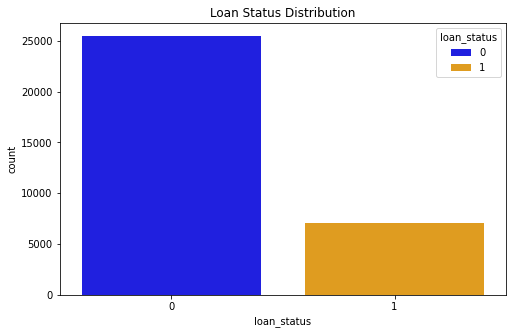

In [155]:
colors = ["blue", "orange"]
plt.figure(figsize = (8,5))
sns.countplot(x='loan_status', data=credit_df, palette = colors, hue='loan_status')
plt.title('Loan Status Distribution')
plt.show()


Distribution of Numerical and Categorical columns

In [156]:
# Distribution of numerical columns
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length']
for column in numerical_columns:
    fig = px.histogram(credit_df[column], x = column, title=f'Distribution of {column}')
    fig.show()


<ipython-input-157-303756b5dcb2>:6: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



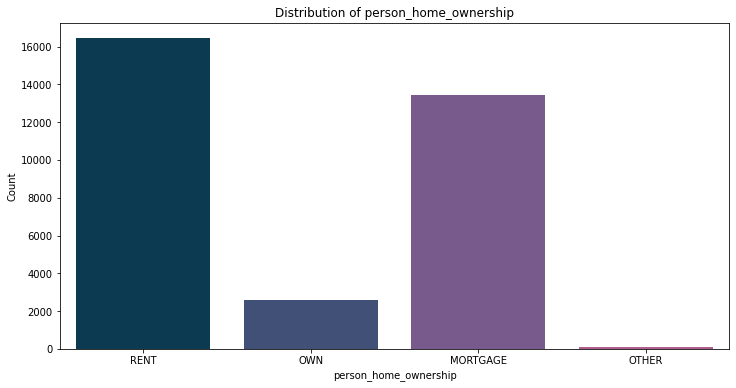

<ipython-input-157-303756b5dcb2>:6: UserWarning:


The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.



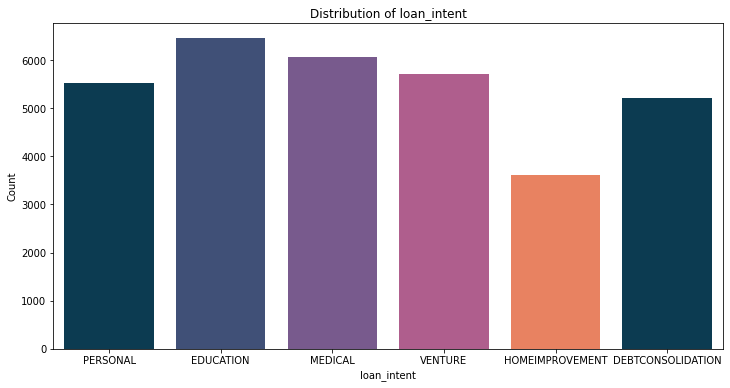

<ipython-input-157-303756b5dcb2>:6: UserWarning:


The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.



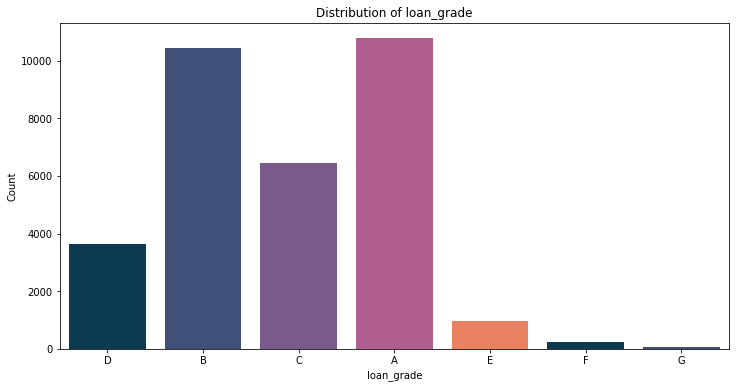

<ipython-input-157-303756b5dcb2>:6: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



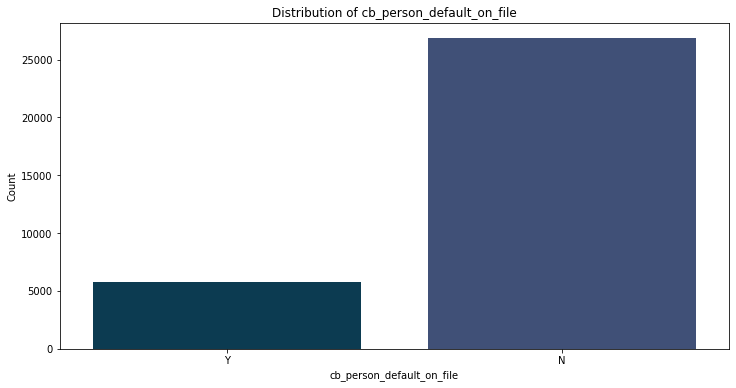

In [157]:
# Univariate analysis - categorical features
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
colors = ['#003f5c','#374c80','#7a5195','#bc5090', '#ff764a']
for column in categorical_columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x=column, data=credit_df, palette=colors,hue=column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

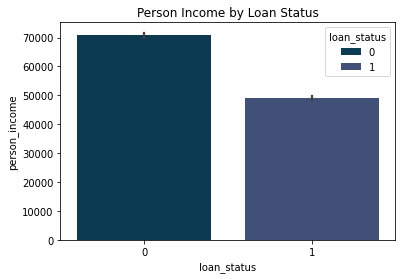

In [158]:
colors = ['#003f5c','#374c80']
sns.barplot(x='loan_status', y='person_income', data=credit_df ,palette = colors, hue = 'loan_status')
plt.title('Person Income by Loan Status')
plt.show()

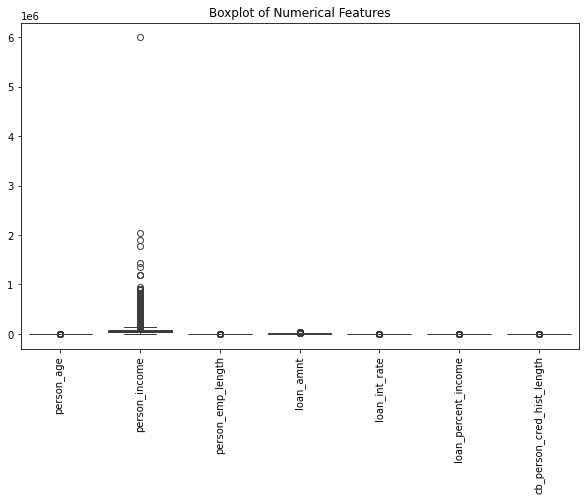

In [159]:
# Outlier detection - you can use box plots or Z-score/IQR methods for numerical features
plt.figure(figsize=(10,6))
sns.boxplot(data=credit_df[numerical_columns])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

<ipython-input-160-7fd64fa4e9d4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



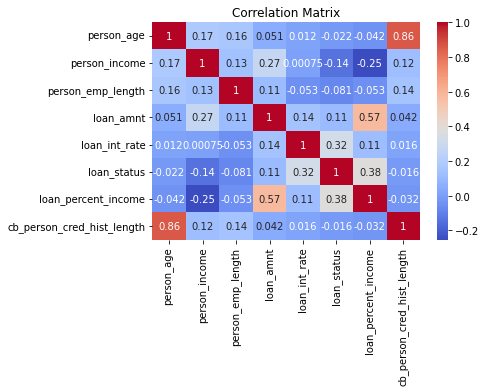

In [160]:
# Correlation analysis
correlation_matrix = credit_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering and Some data preprocessing for our machine learning models

#                               Debt to income ratio 
Calculate the ratio of loan amount to the individual's income (loan_amnt / person_income). This can provide insights into the individual's financial leverage.


Definition of Debt to income ratio
The Debt-to-Income (DTI) ratio is a financial metric that compares an individual's recurring monthly debt payments to their gross monthly income. It is commonly used by lenders to assess an individual's ability to manage monthly payments and repay debts. The DTI ratio provides insights into an individual's financial health and their capacity to take on additional debt responsibly. 

In [161]:
processed_df = credit_df
# Create new feature: Debt-to-Income Ratio
processed_df['debt_to_income_ratio'] = processed_df['loan_amnt'] / processed_df['person_income']
processed_df['debt_to_income_ratio']

0        0.593220
1        0.104167
2        0.572917
3        0.534351
4        0.643382
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: debt_to_income_ratio, Length: 32581, dtype: float64

# One Hot Encoding for Categorical Variables
For encoding categorical variables (person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file), we'll use pandas' get_dummies() method to perform one-hot encoding and use it for our machine learning models.

In [162]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
encoded_data = pd.get_dummies(processed_df[categorical_columns], drop_first=True)# Use drop_first to avoid multicollinearity
encoded_data

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
32577,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32578,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
32579,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [163]:
#Combine encoded categorical variables with the original dataset
processed_df = pd.concat([processed_df.drop(categorical_columns, axis=1), encoded_data], axis=1)

# Scaling numerical columns
using MinMax scaler for the numeric columns instead of StandardScaler...because i want to keep the original shape of the data MinMax scaler scales the data to a fixed range (usually between 0 and 1), preserving the relative distances between data points

In [164]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

processed_df[numerical_columns] = scaler.fit_transform(processed_df[numerical_columns])

In [165]:
pd.set_option('display.max_columns', None)
processed_df.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,debt_to_income_ratio,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.016129,0.009173,1.000000,1.000000,0.595506,1,0.710843,0.035714,0.593220,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,0.008065,0.000934,0.040650,0.014493,0.321348,0,0.120482,0.000000,0.104167,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0.040323,0.000934,0.008130,0.144928,0.418539,1,0.686747,0.035714,0.572917,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.024194,0.010257,0.032520,1.000000,0.551124,1,0.638554,0.000000,0.534351,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,0.032258,0.008406,0.065041,1.000000,0.497191,1,0.662651,0.071429,0.643382,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
5,0.008065,0.000984,0.016260,0.057971,0.096629,1,0.301205,0.000000,0.252525,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0.048387,0.012191,0.065041,1.000000,0.393258,1,0.542169,0.035714,0.453956,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
7,0.032258,0.012501,0.040650,1.000000,0.319663,1,0.530120,0.071429,0.443285,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
8,0.032258,0.013175,0.065041,1.000000,0.195506,1,0.506024,0.000000,0.421687,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9,0.008065,0.001001,0.048780,0.031884,0.523596,1,0.192771,0.035714,0.160000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


# Model selection 
Models used:
1. logistic regression
2. RandomForest Classifier
3. Gradient Boosting classifier
4. XGBoost (Extreme Gradient Boosting Classifier)

# Split data into training and testing 

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [181]:
##slit data in X and Y where Y is the target variable
x = processed_df.drop('loan_status', axis = 1)
y = processed_df['loan_status']

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# initialize the logistic regression model
logreg = LogisticRegression()

#Train the model on the training data 
logreg.fit(x_train, y_train)

#Prediction on the testing data
y_pred_lr = logreg.predict(x_test)

#Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred_lr)
print('Accuracy Logistic R: ', accuracy)

#Classification Report
class_report = classification_report(y_test, y_pred_lr)
print('Classification Report Logistics R: ', class_report)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print('confusion_matrix logistics R: ', conf_matrix )

Accuracy Logistic R:  0.8623599815866196
Classification Report Logistics R:                precision    recall  f1-score   support

           0       0.88      0.95      0.92      5072
           1       0.77      0.54      0.64      1445

    accuracy                           0.86      6517
   macro avg       0.82      0.75      0.78      6517
weighted avg       0.86      0.86      0.85      6517

confusion_matrix logistics R:  [[4833  239]
 [ 658  787]]


# Accuracy:
The accuracy of the logistic regression model is approximately 86.24%. This means that the model correctly classified 86.24% of the instances in the test set.
Classification  Report:

# Precision:
Precision for class 0 (non-default): 88%

Precision for class 1 (default): 77%

Precision is the ratio of correctly predicted instances of a class to the total predicted instances of that class.

In this context, it means that when the model predicts a loan as non-default (class 0), it is correct 88% of the time. Similarly, when it predicts a loan as default (class 1), it is correct 77% of the time.

# Recall (Sensitivity):
Recall for class 0: 95%

Recall for class 1: 54%

Recall is the ratio of correctly predicted instances of a class to the actual instances of that class.

Here, it indicates that the model captures 95% of the actual non-default cases (class 0), but only 54% of the actual default cases (class 1).

# F1-score:
F1-score for class 0: 0.92

F1-score for class 1: 0.64

The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

A high F1-score indicates both high precision and high recall.

In this case, class 0 has a higher F1-score (0.92) than class 1 (0.64), indicating better performance in predicting non-default cases.

# Confusion Matrix:
The confusion matrix provides a detailed breakdown of the model's predictions.

True Negative (TN): 4833 instances were correctly predicted as non-default loans.

False Positive (FP): 239 instances were incorrectly predicted as default loans (Type I error).

False Negative (FN): 658 instances were incorrectly predicted as non-default loans (Type II error).

True Positive (TP): 787 instances were correctly predicted as default loans.

Overall, the logistic regression model demonstrates reasonably good performance in classifying loan default cases, with higher precision and recall for non-default cases compared to default cases.

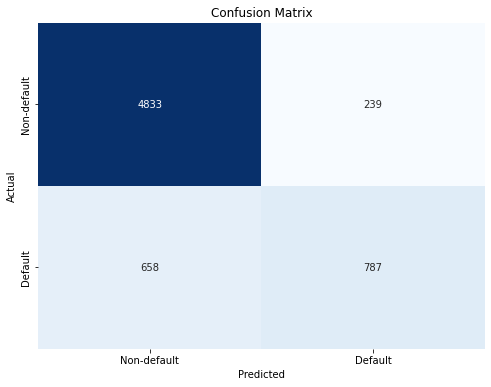

In [176]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-default', 'Default'])
plt.yticks([0.5, 1.5], ['Non-default', 'Default'])
plt.show()


In [182]:

# Create a DataFrame to display actual loan status and predictions
lg_predictions_df = pd.DataFrame({'Actual Loan Status': y_test, 'Predicted Loan Status': y_pred})

# Display the DataFrame
lg_predictions_df.head(40)

,Actual Loan Status,Predicted Loan Status
14668,0,0
24614,0,0
11096,0,0
10424,1,1
26007,1,1
9614,0,0
6204,0,0
19286,0,0
10297,0,0
20560,0,0


# Random Forest Classifier
We are going to train the Random forest classifier model to predict the load_status

In [179]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(x_test)


#Evaluate the model on the test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy Random forest: ', accuracy_rf)

#Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report Random Forest: ', class_report_rf)

#confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('confusion_matrix Random Forest: ', conf_matrix_rf )



Accuracy Random forest:  0.9286481509897192
Classification Report Random Forest:                precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.95      0.72      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.92      6517

confusion_matrix Random Forest:  [[5014   58]
 [ 407 1038]]


# Accuracy (Random Forest):
The accuracy of the Random Forest model is approximately 92.86%. This means that the model correctly classified 92.86% of the instances in the test set.
Classification Report (Random Forest):
# Precision:
Precision for class 0 (non-default): 92%

Precision for class 1 (default): 95%

Precision is the ratio of correctly predicted instances of a class to the total predicted instances of that class.

In this context, it means that when the model predicts a loan as non-default (class 0), it is correct 92% of the time. Similarly, when it predicts a loan as default (class 1), it is correct 95% of the time.
# Recall (Sensitivity):
Recall for class 0: 99%

Recall for class 1: 72%

Recall is the ratio of correctly predicted instances of a class to the actual instances of that class.

Here, it indicates that the model captures 99% of the actual non-default cases (class 0), but only 72% of the actual default cases (class 1).

# F1-score:
F1-score for class 0: 0.96

F1-score for class 1: 0.82

The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

A high F1-score indicates both high precision and high recall.

In this case, class 0 has a higher F1-score (0.96) than class 1 (0.82), indicating better performance in predicting non-default cases.

# Confusion Matrix (Random Forest):
The confusion matrix provides a detailed breakdown of the model's predictions.

True Negative (TN): 5014 instances were correctly predicted as non-default loans.

False Positive (FP): 58 instances were incorrectly predicted as default loans (Type I error).

False Negative (FN): 407 instances were incorrectly predicted as non-default loans (Type II error).

True Positive (TP): 1038 instances were correctly predicted as default loans.

Overall, the Random Forest model demonstrates strong performance in classifying loan default cases, with high precision and recall for both non-default and default cases.


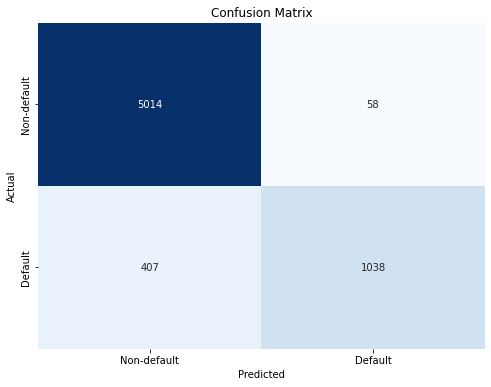

In [180]:
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-default', 'Default'])
plt.yticks([0.5, 1.5], ['Non-default', 'Default'])
plt.show()


In [183]:
# Create a DataFrame to display actual loan status and predictions
rf_predictions_df = pd.DataFrame({'Actual Loan Status': y_test, 'Predicted Loan Status': y_pred_rf})

# Display the DataFrame
rf_predictions_df.head(40)

,Actual Loan Status,Predicted Loan Status
14668,0,0
24614,0,0
11096,0,0
10424,1,1
26007,1,1
9614,0,0
6204,0,0
19286,0,0
10297,0,0
20560,0,0


# Gradient Boosting Classifier
we are going to use the Gradient Boosting classifier for superior predictive performance.

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
gb_classifier.fit(x_train, y_train)

# Predict on the testing data
y_pred_gb = gb_classifier.predict(x_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

# Classification report
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))


Accuracy (Gradient Boosting): 0.9206690194874942
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5072
           1       0.93      0.69      0.79      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.84      0.87      6517
weighted avg       0.92      0.92      0.92      6517

Confusion Matrix (Gradient Boosting):
[[4998   74]
 [ 443 1002]]


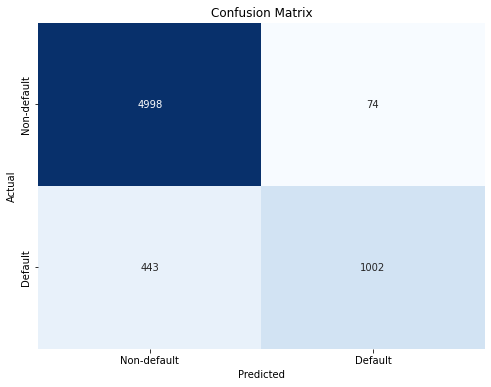

In [185]:
cm = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-default', 'Default'])
plt.yticks([0.5, 1.5], ['Non-default', 'Default'])
plt.show()


In [187]:
# Create a DataFrame to display actual loan status and predictions
gb_predictions_df = pd.DataFrame({'Actual Loan Status': y_test, 'Predicted Loan Status': y_pred_gb})

# Display the DataFrame
gb_predictions_df.head(20)

,Actual Loan Status,Predicted Loan Status
14668,0,0
24614,0,0
11096,0,0
10424,1,1
26007,1,1
9614,0,0
6204,0,0
19286,0,0
10297,0,0
20560,0,0


In [189]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
xgb_classifier.fit(x_train, y_train)

# Predict on the testing data
y_pred_xgb = xgb_classifier.predict(x_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)

# Classification report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


Accuracy (XGBoost): 0.9341721651066441
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.74      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.90      6517
weighted avg       0.94      0.93      0.93      6517

Confusion Matrix (XGBoost):
[[5021   51]
 [ 378 1067]]


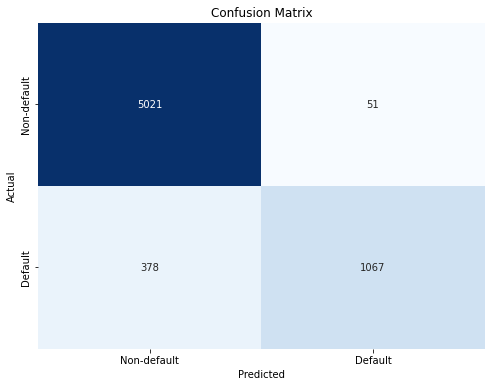

In [190]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-default', 'Default'])
plt.yticks([0.5, 1.5], ['Non-default', 'Default'])
plt.show()


# Accuracy:
 The overall accuracy of the model is approximately 93.42%, which indicates the proportion of correctly predicted instances (both positive and negative) out of the total instances.

# Precision: 
Precision is the ratio of true positive predictions to the total predicted positives. For class 0 (presumably indicating non-defaulters), the precision is 0.93, indicating that 93% of the instances predicted as non-defaulters are actually non-defaulters. For class 1 (presumably indicating defaulters), the precision is 0.95, indicating that 95% of the instances predicted as defaulters are actually defaulters.

# Recall:
 Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives. For class 0, the recall is 0.99, indicating that 99% of the actual non-defaulters were correctly classified. For class 1, the recall is 0.74, indicating that 74% of the actual defaulters were correctly classified.

# F1-score
: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.96, and for class 1, the F1-score is 0.83.

# Support:
 The support indicates the number of actual occurrences of each class in the dataset. There are 5072 instances of class 0 and 1445 instances of class 1.

# Confusion Matrix:
 The confusion matrix provides a detailed breakdown of the model's predictions. It shows that out of 5072 instances of class 0, 5021 were correctly classified (true negatives), and 51 were incorrectly classified as class 1 (false positives). Out of 1445 instances of class 1, 1067 were correctly classified (true positives), and 378 were incorrectly classified as class 0 (false negatives).

Overall, the XGBoost model seems to perform well, especially in terms of precision and accuracy. However, there is a noticeable imbalance in the recall between the two classes, indicating potential room for improvement, especially in correctly identifying instances of class 1 (defaulters). 

In [191]:
# Create a DataFrame to display actual loan status and predictions
xgb_predictions_df = pd.DataFrame({'Actual Loan Status': y_test, 'Predicted Loan Status': y_pred_xgb})

# Display the DataFrame
xgb_predictions_df.head(20)

,Actual Loan Status,Predicted Loan Status
14668,0,0
24614,0,0
11096,0,0
10424,1,1
26007,1,1
9614,0,0
6204,0,0
19286,0,0
10297,0,0
20560,0,0


In [194]:
# Initialize models with default parameters
logreg_default = LogisticRegression()
rf_default = RandomForestClassifier()
gb_default = GradientBoostingClassifier()
xgb_default = xgb.XGBClassifier()

# Train models on the training data
logreg_default.fit(x_train, y_train)
rf_default.fit(x_train, y_train)
gb_default.fit(x_train, y_train)
xgb_default.fit(x_train, y_train)

# Predict on the test data
y_pred_logreg_default = logreg_default.predict(x_test)
accuracy_logreg_default = accuracy_score(y_test, y_pred_logreg_default)

y_pred_rf_default = rf_default.predict(x_test)
accuracy_rf_default = accuracy_score(y_test, y_pred_rf_default)

y_pred_gb_default = gb_default.predict(x_test)
accuracy_gb_default = accuracy_score(y_test, y_pred_gb_default)

y_pred_xgb_default = xgb_default.predict(x_test)
accuracy_xgb_default = accuracy_score(y_test, y_pred_xgb_default)

# Compare accuracies
print("Accuracy (Logistic Regression - Default):", accuracy_logreg_default)
print("Accuracy (Random Forest - Default):", accuracy_rf_default)
print("Accuracy (Gradient Boosting - Default):", accuracy_gb_default)
print("Accuracy (XGBoost - Default):", accuracy_xgb_default)


Accuracy (Logistic Regression - Default): 0.8623599815866196
Accuracy (Random Forest - Default): 0.9288015958263004
Accuracy (Gradient Boosting - Default): 0.9206690194874942
Accuracy (XGBoost - Default): 0.9341721651066441


Based on these results, XGBoost achieved the highest accuracy among the models without hyperparameter tuning.